# Step 1: Data Loading

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


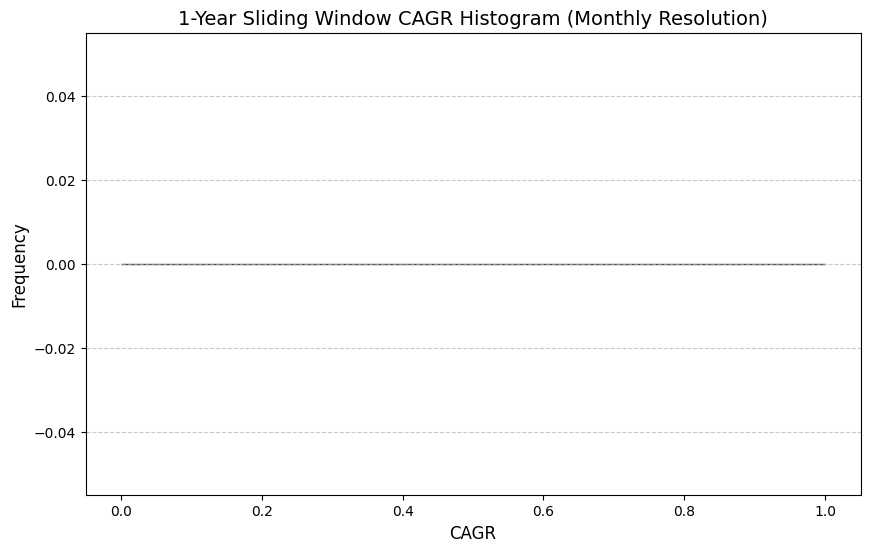

In [17]:
# Step 1: Data Loading
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import time
import os
from datetime import datetime, timedelta
import pytz

# Function to load financial data and cache it in CSV
def load_financial_data(ticker, filename):
    if os.path.exists(filename):
        # Load from CSV if it exists
        hist = pd.read_csv(filename, index_col='Date', parse_dates=True)
    else:
        # Fetch adjusted data from Yahoo Finance
        data = yf.Ticker(ticker)
        time.sleep(2)  # Adding a 2-second delay between requests to avoid being rate-limited
        hist = data.history(period="max", auto_adjust=True)
        hist.to_csv(filename)  # Save the data to avoid reloading frequently
    # Filter data for the last 15 years
    fifteen_years_ago = datetime.now(pytz.UTC) - timedelta(days=15 * 365)
    hist.index = pd.to_datetime(hist.index).tz_localize('UTC')  # Ensure datetime index is timezone-aware
    hist = hist[hist.index >= fifteen_years_ago]
    return hist

# Function to calculate 1-year rolling CAGR
def calculate_rolling_cagr(monthly_data):
    rolling_cagr = []
    for i in range(12, len(monthly_data)):
        start_price = monthly_data.iloc[i - 12]
        end_price = monthly_data.iloc[i]
        cagr = (end_price / start_price) ** (1 / 1) - 1  # Annualized CAGR
        rolling_cagr.append(cagr)
    # Create a DataFrame with the results
    rolling_cagr_df = pd.DataFrame({
        'Date': monthly_data.index[12:],
        '1Y CAGR': rolling_cagr
    })
    return rolling_cagr_df

# Function to plot the histogram of rolling CAGR
def plot_cagr_histogram(rolling_cagr):
    plt.figure(figsize=(10, 6))
    plt.hist(rolling_cagr, bins=20, edgecolor='black', alpha=0.75)
    plt.title('1-Year Sliding Window CAGR Histogram (Monthly Resolution)', fontsize=14)
    plt.xlabel('CAGR', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Load financial data
hist = load_financial_data(ticker="AAPL", filename="AAPL_15y_data.csv")
print(hist)

# Step 2: Data Processing
# Resample to monthly data
monthly_data = hist['Close'].resample('MS').last()

# Calculate rolling CAGR
rolling_cagr_df = calculate_rolling_cagr(monthly_data)

# Step 3: Visualization
# Plot Histogram
plot_cagr_histogram(rolling_cagr_df['1Y CAGR'])



# Step 2: Financial Data Processing


# Step 3: Select Stocks and Visualize Data